Proyecto final presentado por: Juan Fernando Zapata Valderrama

In [ ]:
import pandas as pd
import kagglehub
import os

#importamos el dataser correspondiente
path = kagglehub.dataset_download("datasetengineer/smart-farming-data-2024-sf24")

print("Path to dataset files:", path)

# List files in the downloaded directory to find the CSV file
files_in_directory = os.listdir(path)

# Assuming there's only one CSV file or you know its name, construct the full path
# You might need to adjust this if there are multiple CSVs or a different file name
csv_file_name = None
for file in files_in_directory:
    if file.endswith('.csv'):
        csv_file_name = file
        break

if csv_file_name:
    full_csv_path = os.path.join(path, csv_file_name)
    df = pd.read_csv(full_csv_path)
    print(df.head())
else:
    print("No CSV file found in the downloaded directory.")

Using Colab cache for faster access to the 'smart-farming-data-2024-sf24' dataset.
Path to dataset files: /kaggle/input/smart-farming-data-2024-sf24
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                  

In [ ]:
df[['crop_density','sunlight_exposure']].describe()

,crop_density,sunlight_exposure
count,2200.000000,2200.000000
mean,12.344959,8.570609
std,4.297494,1.999382
min,5.004341,5.000710
25%,8.585734,6.904620
50%,12.303616,8.609968
75%,15.975567,10.220394
max,19.988474,11.991041


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

array([[<Axes: title={'center': 'K'}>, <Axes: title={'center': 'N'}>],
       [<Axes: title={'center': 'P'}>, <Axes: >]], dtype=object)

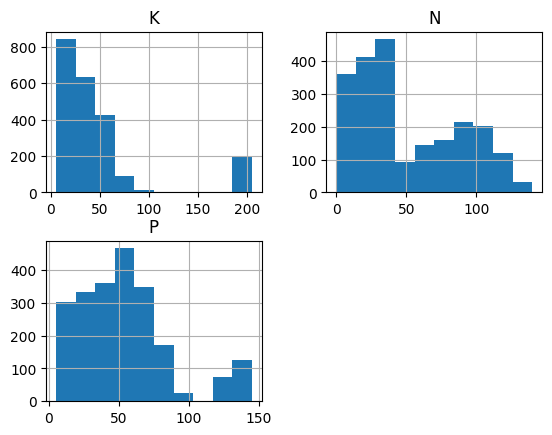

In [ ]:
df[['K','N','P']].hist()

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>]], dtype=object)

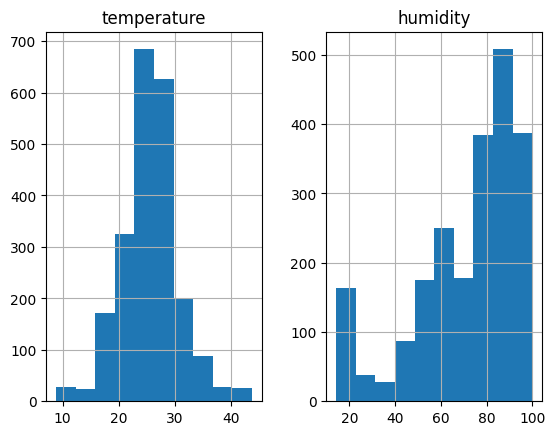

In [ ]:
df[["temperature","humidity"]].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [ ]:
df.drop('label', axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.030749,0.021026,0.005456,...,-0.000213,-0.005733,-0.012270,-0.019974,-0.023336,0.009785,-0.023980,0.020837,-0.021273,0.005164
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.017027,-0.000833,0.004664,...,-0.012194,0.012399,-0.042635,0.000187,-0.008490,-0.022348,0.044838,-0.009455,0.030244,0.009272
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.008116,0.023587,0.004542,...,-0.024260,0.001386,-0.035940,0.011401,0.016329,-0.017419,0.034753,0.017159,0.025110,-0.000372
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.009842,-0.015571,0.001200,...,0.015925,-0.031864,0.026098,-0.007207,0.015709,-0.002026,-0.001946,0.031165,-0.007591,0.036147
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.010933,-0.012640,0.035394,...,-0.012039,-0.016798,-0.032880,0.032015,0.033408,-0.009744,-0.041271,0.033118,-0.024591,-0.043027
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.023978,-0.020061,-0.008046,...,-0.010069,0.028987,0.002701,0.009845,-0.019893,-0.003723,0.043606,0.036664,-0.003499,-0.030026
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.048593,0.012959,0.016778,...,0.005035,0.002745,-0.005506,-0.031953,-0.011299,-0.035767,-0.022371,-0.001614,0.004942,-0.010738
soil_moisture,-0.030749,0.017027,0.008116,-0.009842,0.010933,-0.023978,-0.048593,1.000000,0.001269,0.006502,...,0.023771,-0.044011,0.005281,0.010169,-0.000946,0.002546,0.000720,-0.015919,0.012678,0.005135
soil_type,0.021026,-0.000833,0.023587,-0.015571,-0.012640,-0.020061,0.012959,0.001269,1.000000,-0.006840,...,-0.004594,0.026638,0.029293,-0.012971,-0.006542,0.024603,-0.008871,-0.019257,-0.034281,-0.001946
sunlight_exposure,0.005456,0.004664,0.004542,0.001200,0.035394,-0.008046,0.016778,0.006502,-0.006840,1.000000,...,0.002313,0.004463,0.028616,0.016590,0.015251,0.042288,-0.003850,-0.017433,-0.012445,0.012438


In [ ]:
df['label'].value_counts(normalize=True)

,proportion
label,
rice,0.045455
maize,0.045455
chickpea,0.045455
kidneybeans,0.045455
pigeonpeas,0.045455
mothbeans,0.045455
mungbean,0.045455
blackgram,0.045455
lentil,0.045455


### Performing One-Way ANOVA to find significant features

We will use `scipy.stats.f_oneway` to perform a one-way ANOVA test for each numerical column against the `label` column. This will help us identify which features show a statistically significant difference across different crop labels.

In [ ]:
import pandas as pd
import kagglehub
import os
from scipy.stats import f_oneway
import numpy as np

# Ensure df is available. This block is added to handle cases where df might not be defined
# if cells are run out of order or after a kernel restart.
if 'df' not in locals() and 'df' not in globals():
    try:
        path = kagglehub.dataset_download("datasetengineer/smart-farming-data-2024-sf24")
        files_in_directory = os.listdir(path)
        csv_file_name = None
        for file in files_in_directory:
            if file.endswith('.csv'):
                csv_file_name = file
                break
        if csv_file_name:
            full_csv_path = os.path.join(path, csv_file_name)
            df = pd.read_csv(full_csv_path)
        else:
            print("Error: No CSV file found in the downloaded directory. Cannot proceed with ANOVA.")
            raise FileNotFoundError("CSV file not found")
    except Exception as e:
        print(f"Error loading DataFrame: {e}")
        raise

# Get all unique labels
labels = df['label'].unique()

# Identify numerical columns (excluding 'label' itself and any other non-numerical identifiers)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("ANOVA Test Results (p-value):\n")

anova_results = {}

for col in numerical_cols:
    # Prepare data for ANOVA: create a list of arrays, where each array contains the values
    # of the current numerical column for a specific label
    data_for_anova = [df[df['label'] == l][col].dropna() for l in labels]

    # Perform one-way ANOVA
    if all(len(d) > 0 for d in data_for_anova): # Ensure all groups have data
        f_statistic, p_value = f_oneway(*data_for_anova)
        anova_results[col] = p_value
        print(f"Feature: {col:<25} P-value: {p_value:.4f}")
    else:
        print(f"Feature: {col:<25} Skipping (not enough data in all groups)")

# Sort results by p-value to see the most significant features first
sorted_anova_results = sorted(anova_results.items(), key=lambda x: x[1])


ANOVA Test Results (p-value):

Feature: N                         P-value: 0.0000
Feature: P                         P-value: 0.0000
Feature: K                         P-value: 0.0000
Feature: temperature               P-value: 0.0000
Feature: humidity                  P-value: 0.0000
Feature: ph                        P-value: 0.0000
Feature: rainfall                  P-value: 0.0000
Feature: soil_moisture             P-value: 0.2071
Feature: soil_type                 P-value: 0.4585
Feature: sunlight_exposure         P-value: 0.3121
Feature: wind_speed                P-value: 0.0653
Feature: co2_concentration         P-value: 0.6341
Feature: organic_matter            P-value: 0.8727
Feature: irrigation_frequency      P-value: 0.9614
Feature: crop_density              P-value: 0.3794
Feature: pest_pressure             P-value: 0.0898
Feature: fertilizer_usage          P-value: 0.7311
Feature: growth_stage              P-value: 0.3082
Feature: urban_area_proximity      P-value: 0.1081


### Visualizing the most significant features

To better understand how these significant features differ across labels, we can create box plots or violin plots. Let's visualize the top 3-5 features with the lowest p-values.

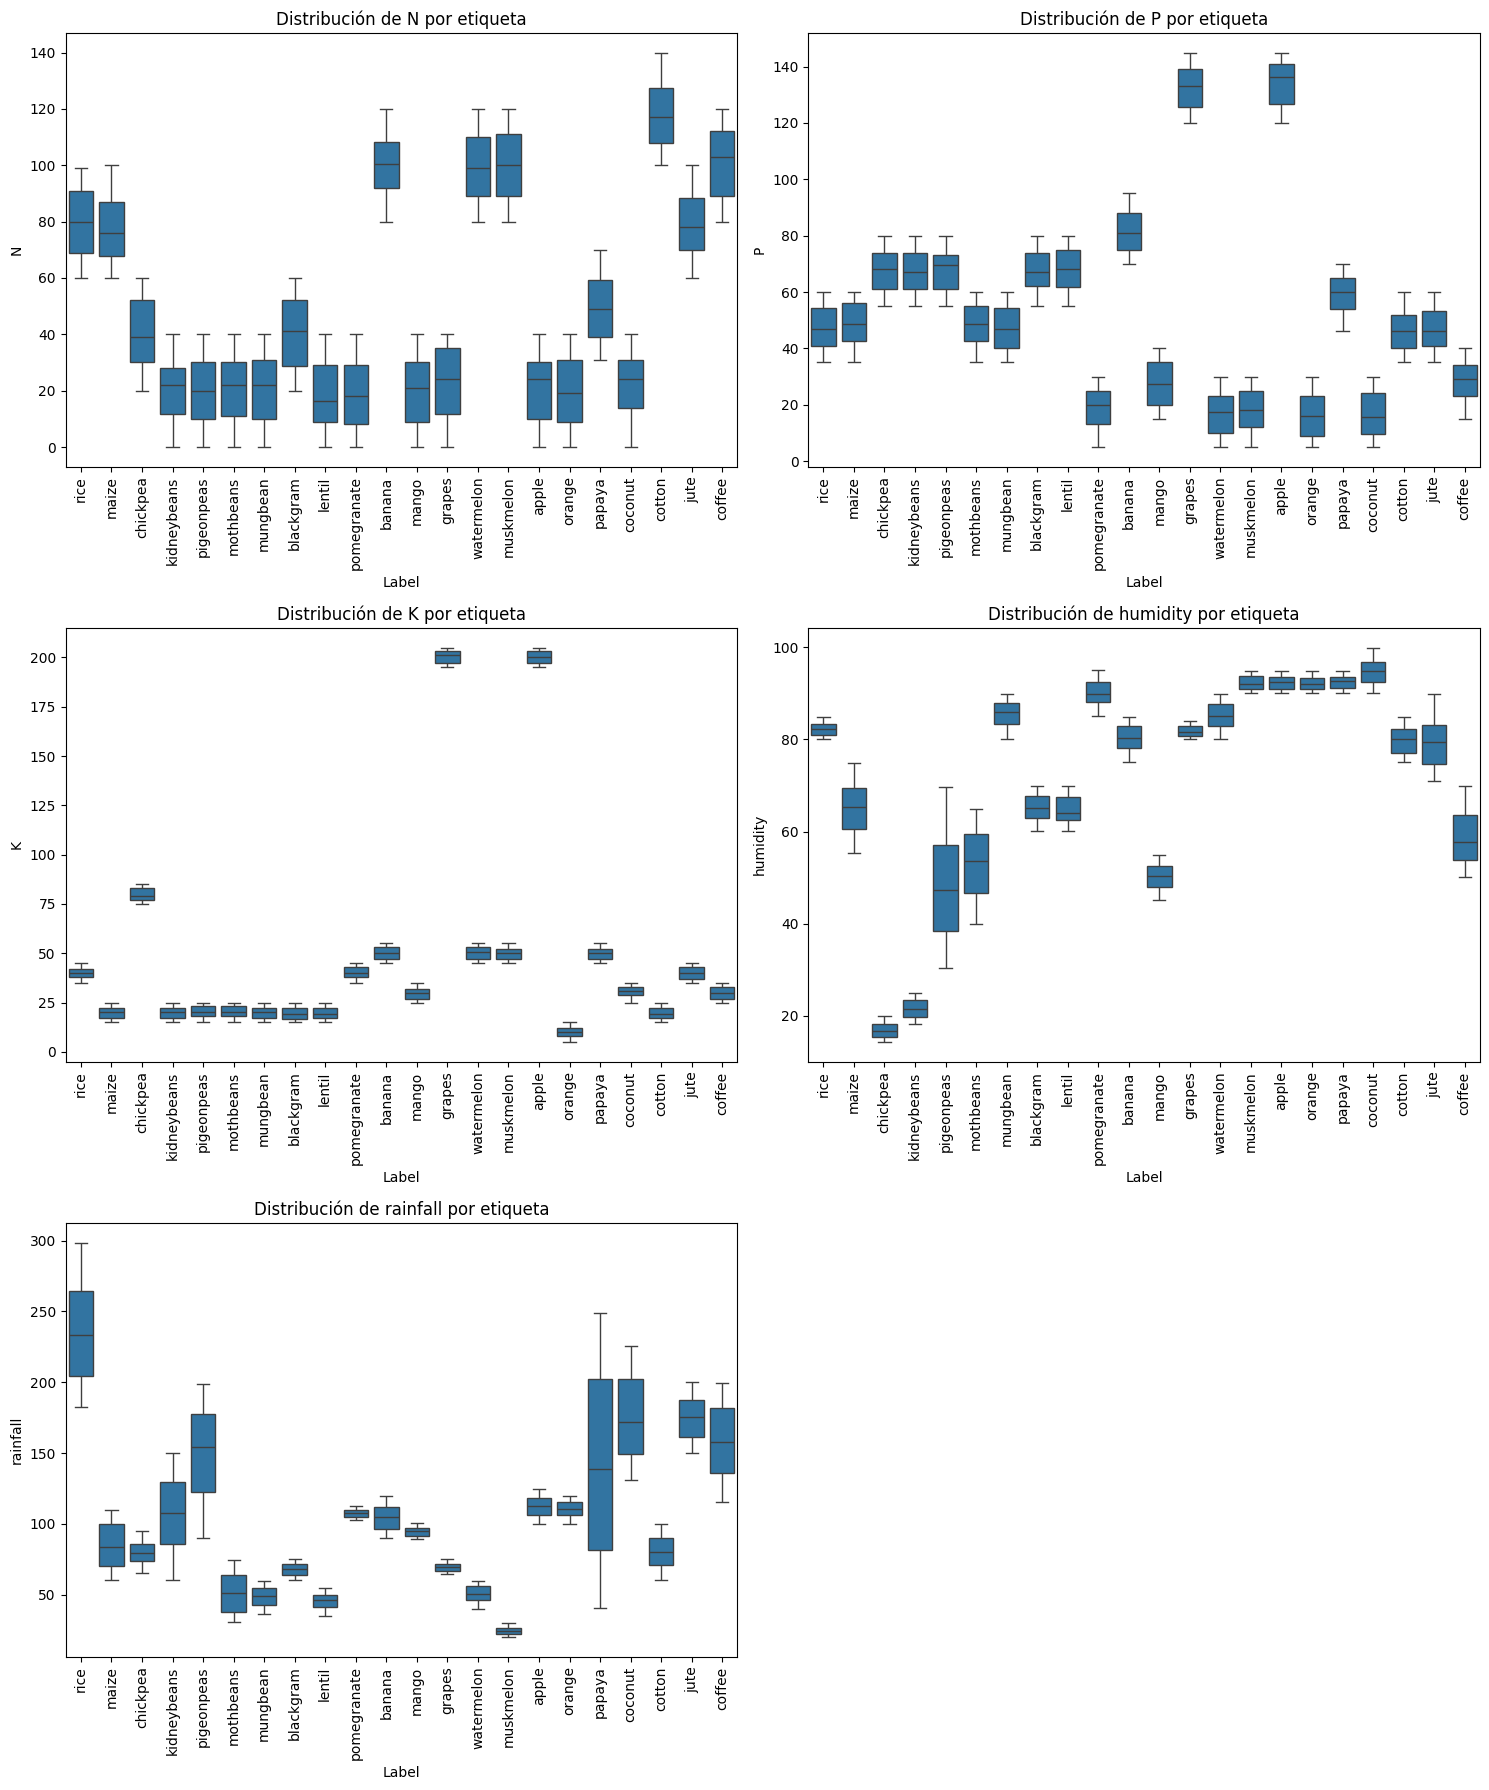

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# obtenemos las 5 características con p=0.000
top_significant_features = [feature for feature, p_value in sorted_anova_results[:5]]

num_features = len(top_significant_features)
if num_features == 0:
    print("No existen las suficientes características para .")
else:
    # Calculate grid dimensions: aiming for 2 columns
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 6 * num_rows))

    for i, feature in enumerate(top_significant_features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(x='label', y=feature, data=df)
        plt.title(f'Distribución de {feature} por etiqueta')
        plt.xlabel('Label')
        plt.ylabel(feature)
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

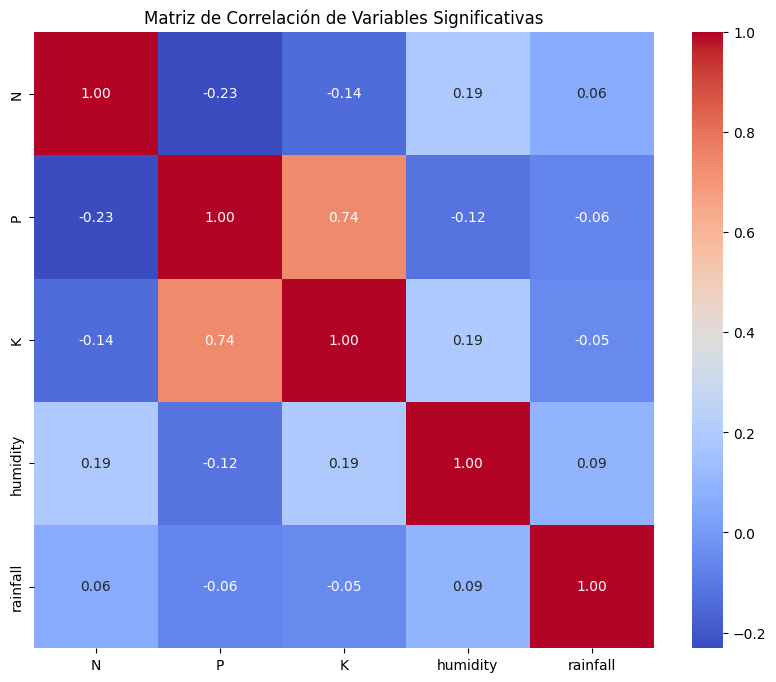

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_features = df[top_significant_features]
matriz_correlacion = df_features.corr()


# 3. Visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Significativas')
plt.show()

### Preparing Data for Random Forest

Based on the ANOVA test, we'll select the features with a p-value of 0.0000. These features are 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall'. The target variable will be 'label'.

Next, we will split the data into training and testing sets to prepare for model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Select the features identified as significant from ANOVA results
significant_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[significant_features]
y = df['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


### Training the Random Forest Classifier

Now that the data is prepared, we will train a Random Forest Classifier using the training data (`X_train`, `y_train`). We'll then make predictions on the test data (`X_test`) and evaluate the model's performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
# You can tune hyperparameters like n_estimators, max_depth, etc.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully!")

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Classifier trained successfully!

Accuracy: 0.9932

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00   

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define a dictionary with hyperparameters and their potential ranges for tuning
hyperparameter_ranges = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [10, 20, 30, 40, 50, None],   # Maximum number of levels in a tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

print("Hyperparameter Ranges for RandomForestClassifier:")
for param, values in hyperparameter_ranges.items():
    print(f"  {param}: {values}")


Hyperparameter Ranges for RandomForestClassifier:
  n_estimators: [100, 200, 300, 400, 500]
  max_features: ['auto', 'sqrt', 'log2']
  max_depth: [10, 20, 30, 40, 50, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  bootstrap: [True, False]


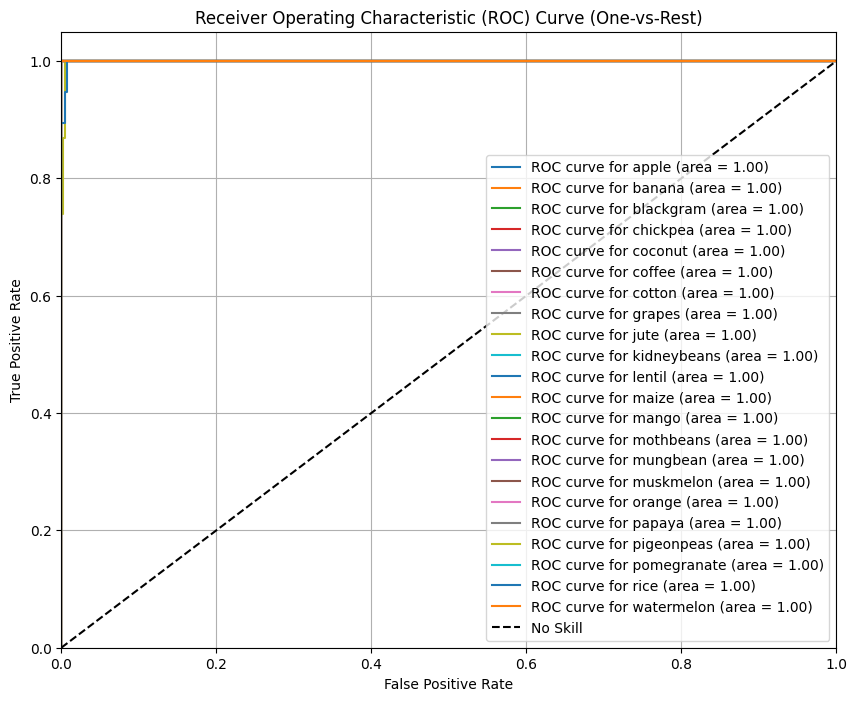

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
# rf_classifier.predict_proba(X_test) returns a 2D array where each row sums to 1
# and each column corresponds to the probability of that class.

# Get unique classes
classes = rf_classifier.classes_

plt.figure(figsize=(10, 8))

for i, class_name in enumerate(classes):
    # Get probabilities for the current class
    y_prob = rf_classifier.predict_proba(X_test)[:, i]

    # Binarize the true labels for the current class (one-vs-rest)
    # This creates a binary array where 1 means the sample belongs to the current class_name, 0 otherwise.
    y_test_bin = (y_test == class_name).astype(int)

    # Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    # Calculate the Area Under the Curve (AUC) for the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'ROC curve for {class_name} (area = {roc_auc:.2f})')

# Plot the random classifier baseline (a diagonal line from (0,0) to (1,1))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Random classifier baseline

# Set plot limits and labels for better readability
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
import joblib
import os

# Define the filename for saving the model
model_filename = 'random_forest_model.joblib'

# Save the trained model to the specified file
joblib.dump(rf_classifier, model_filename)

print(f"Model saved successfully to {os.path.abspath(model_filename)}")

Model saved successfully to /content/random_forest_model.joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful